# Imports y carga de datos

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error

## Cargamos el dataset de casas

In [4]:
df_casas = pd.read_csv("Recursos/04-casas_regresion.csv")

# Vemos las primeras filas
df_casas.head()

,m2,dormitorios,banos,antiguedad,barrio,precio
0,149,1,1,37,Sur,75418437
1,166,2,2,13,Sur,90309700
2,106,4,2,36,Oriente,85624196
3,138,4,1,6,Centro,101668944
4,57,3,2,11,Centro,67953920


* m2 → metros cuadrados del inmueble
* dormitorios → número de dormitorios
* banos → número de baños
* antiguedad → años desde la construcción
* barrio → categoría (Centro, Sur, Norte, Oriente, Poniente)
* precio → precio de la casa (target para regresión)

In [5]:
# Información general del dataset
df_casas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   m2           200 non-null    int64 
 1   dormitorios  200 non-null    int64 
 2   banos        200 non-null    int64 
 3   antiguedad   200 non-null    int64 
 4   barrio       200 non-null    object
 5   precio       200 non-null    int64 
dtypes: int64(5), object(1)
memory usage: 9.5+ KB


In [6]:
# Estadísticas básicas
df_casas[["m2", "precio"]].describe()

,m2,precio
count,200.000000,2.000000e+02
mean,114.525000,7.647459e+07
std,40.596301,2.310828e+07
min,40.000000,2.734922e+07
25%,85.000000,5.785140e+07
50%,115.500000,7.722423e+07
75%,148.250000,9.364269e+07
max,179.000000,1.271086e+08


## Scatter para ver relación

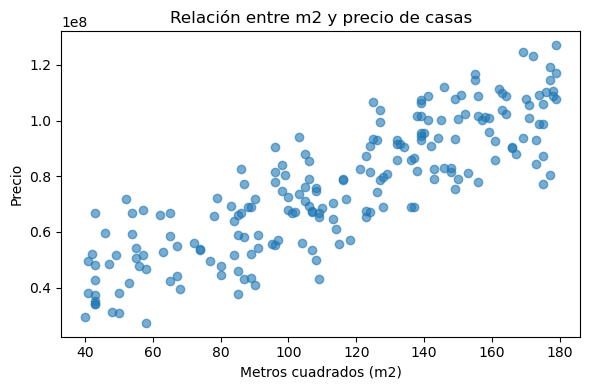

In [7]:
plt.figure(figsize=(6, 4))
plt.scatter(df_casas["m2"], df_casas["precio"], alpha=0.6)
plt.xlabel("Metros cuadrados (m2)")
plt.ylabel("Precio")
plt.title("Relación entre m2 y precio de casas")
plt.tight_layout()
plt.show()

# Regresión lineal simple (solo m2 → precio)
* Esto es perfecto para explicar la idea de “ajustar una recta”.
## Definir X, y Y train/test

In [8]:
# Usaremos solo m2 como feature (regresión lineal simple)
X = df_casas[["m2"]]   # DataFrame con una columna
y = df_casas["precio"] # Serie con el precio

# Dividimos en entrenamiento y test
X_train, X_test, y_train, y_test = train_test_split(
    X,
    y,
    test_size=0.2,
    random_state=42
)

## Entrenar el modelo

In [9]:
# Creamos el modelo de regresión lineal
reg_simple = LinearRegression()

# Entrenamos el modelo con los datos de entrenamiento
reg_simple.fit(X_train, y_train)


,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


## coeficientes y ecuación

In [10]:
# Intercepto (b0) y coeficiente (b1) del modelo
b0 = reg_simple.intercept_
b1 = reg_simple.coef_[0]

print("Intercepto (b0):", b0)
print("Coeficiente m2 (b1):", b1)
print(f"Modelo: precio ≈ {b0:.2f} + {b1:.2f} * m2")


Intercepto (b0): 21193451.221489973
Coeficiente m2 (b1): 479029.698128133
Modelo: precio ≈ 21193451.22 + 479029.70 * m2


## visualizar la recta sobre los datos

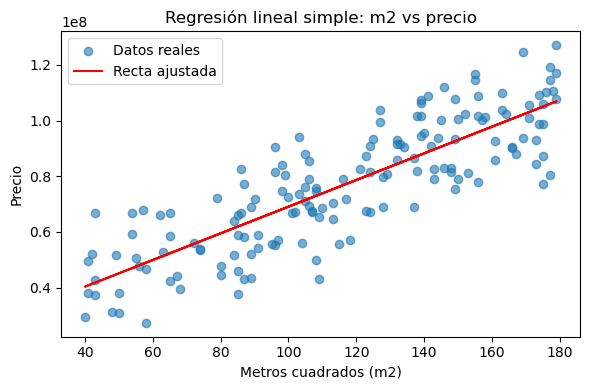

In [11]:
# Predicciones para el conjunto de entrenamiento
y_train_pred = reg_simple.predict(X_train)

plt.figure(figsize=(6, 4))
plt.scatter(X_train["m2"], y_train, alpha=0.6, label="Datos reales")
plt.plot(X_train["m2"], y_train_pred, color="red", label="Recta ajustada")
plt.xlabel("Metros cuadrados (m2)")
plt.ylabel("Precio")
plt.title("Regresión lineal simple: m2 vs precio")
plt.legend()
plt.tight_layout()
plt.show()

## métricas en el conjunto de test

In [12]:
# Predicciones en el conjunto de test
y_test_pred = reg_simple.predict(X_test)

# MAE y RMSE en test
mae_simple = mean_absolute_error(y_test, y_test_pred)
mse_simple = mean_squared_error(y_test, y_test_pred)
rmse_simple = np.sqrt(mse_simple)

print("MAE  (regresión simple):", mae_simple)
print("RMSE (regresión simple):", rmse_simple)


MAE  (regresión simple): 9357394.340680853
RMSE (regresión simple): 11495343.68448068


# Regresión lineal múltiple
* Ahora usamos más variables (m2, dormitorios, baños, antigüedad) para intentar mejorar el modelo.

In [13]:
# Usamos varias features para predecir el precio (regresión múltiple)
X_multi = df_casas[["m2", "dormitorios", "banos", "antiguedad"]]
y_multi = df_casas["precio"]

X_train_m, X_test_m, y_train_m, y_test_m = train_test_split(
    X_multi,
    y_multi,
    test_size=0.2,
    random_state=42
)

## entrenar el modelo múltiple

In [14]:
reg_multi = LinearRegression()
reg_multi.fit(X_train_m, y_train_m)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


# coeficientes

In [15]:
# Intercepto y coeficientes
b0_m = reg_multi.intercept_
coeficientes = reg_multi.coef_

print("Intercepto (b0):", b0_m)
for nombre_col, coef in zip(X_multi.columns, coeficientes):
    print(f"Coeficiente para {nombre_col}: {coef:.2f}")


Intercepto (b0): 2798572.2855091244
Coeficiente para m2: 459686.84
Coeficiente para dormitorios: 9329392.63
Coeficiente para banos: -173866.19
Coeficiente para antiguedad: -145899.47


## métricas de la regresión múltiple

In [16]:
y_test_m_pred = reg_multi.predict(X_test_m)

mae_multi = mean_absolute_error(y_test_m, y_test_m_pred)
mse_multi = mean_squared_error(y_test_m, y_test_m_pred)
rmse_multi = np.sqrt(mse_multi)

print("MAE  (regresión múltiple):", mae_multi)
print("RMSE (regresión múltiple):", rmse_multi)


MAE  (regresión múltiple): 5932917.868089251
RMSE (regresión múltiple): 7440352.761696495
